In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [99]:
df_train=pd.read_csv('WIPRO_train.csv')
df_test=pd.read_csv("WIPRO_test.csv")
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dollar
0,03-01-2005,84.937508,85.162506,83.880005,84.847504,70.815315,3814488.0,44.1
1,04-01-2005,84.937508,85.500008,81.562508,84.268127,70.331779,3809146.0,44.1
2,05-01-2005,83.700005,83.700005,78.862503,79.571251,66.411659,13460968.0,44.1
3,06-01-2005,79.537506,80.437508,77.062500,77.557503,64.730949,12063199.0,44.1
4,07-01-2005,77.625000,78.975006,77.304375,78.721878,65.702766,6582053.0,44.1


In [100]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [101]:
features=list(df_train)[1:6]
features

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [102]:
df_for_training=df_train[features].astype(float)

In [103]:
print(df_for_training)

            Open        High         Low       Close   Adj Close
0      84.937508   85.162506   83.880005   84.847504   70.815315
1      84.937508   85.500008   81.562508   84.268127   70.331779
2      83.700005   83.700005   78.862503   79.571251   66.411659
3      79.537506   80.437508   77.062500   77.557503   64.730949
4      77.625000   78.975006   77.304375   78.721878   65.702766
...          ...         ...         ...         ...         ...
3209  223.500061  227.550049  222.037552  226.200058  221.217987
3210  225.937561  230.250061  223.612549  227.175049  222.171494
3211  227.925049  231.000061  225.037552  229.950058  224.885406
3212  229.425064  232.425064  226.875061  231.000061  225.912262
3213  229.050064  237.300064  227.250061  235.687561  230.496521

[3207 rows x 5 columns]


In [104]:
df_for_testing=df_test[features].astype(float)

In [105]:
df_for_testing

,Open,High,Low,Close,Adj Close
0,233.625061,240.000061,232.087555,237.412552,232.183533
1,236.887558,243.000061,235.837555,239.025055,233.760529
2,240.300064,240.300064,231.562561,232.462555,227.342545
3,232.575058,234.750061,230.587555,233.737564,228.589493
4,234.750061,235.425064,230.775055,232.162552,227.049149
...,...,...,...,...,...
1052,598.000000,598.000000,591.000000,593.549988,593.549988
1053,592.000000,592.000000,577.500000,580.849976,580.849976
1054,586.000000,587.000000,580.500000,583.650024,583.650024
1055,584.000000,584.250000,568.099976,571.099976,571.099976


In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_for_training_scaled=scaler.fit_transform(df_for_training)

In [107]:
trainX = []
trainY_open = []
trainY_high = []
trainY_low = []
trainY_close = []
trainY_adjClose = []

n_past = 30  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled)):
    trainX.append(df_for_training_scaled[i - n_past:i])
    trainY_open.append(df_for_training_scaled[i, 0])
    trainY_high.append(df_for_training_scaled[i, 1])
    trainY_low.append(df_for_training_scaled[i, 2])
    trainY_close.append(df_for_training_scaled[i, 3])
    trainY_adjClose.append(df_for_training_scaled[i, 4])

trainX, trainY_open,trainY_high,trainY_low,trainY_close,trainY_adjClose = np.array(trainX), np.array(trainY_open),np.array(trainY_high),np.array(trainY_low),np.array(trainY_close),np.array(trainY_adjClose)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY_open shape == {}.'.format(trainY_open.shape))
print('trainY_high shape == {}.'.format(trainY_high.shape))
print('trainY_low shape == {}.'.format(trainY_low.shape))
print('trainY_close shape == {}.'.format(trainY_close.shape))
print('trainY_adjClose shape == {}.'.format(trainY_adjClose.shape))

trainX shape == (3177, 30, 5).
trainY_open shape == (3177,).
trainY_high shape == (3177,).
trainY_low shape == (3177,).
trainY_close shape == (3177,).
trainY_adjClose shape == (3177,).


In [108]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.layers import LSTM

For Opening Price

In [109]:
model_open = Sequential()
#first layer
model_open.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_open.add(Dropout(0.2))

#second layer
model_open.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_open.add(Dropout(0.3))


#third layer
model_open.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_open.add(Dropout(0.4))



#fourth layer
model_open.add(LSTM(units=100,activation='tanh'))
model_open.add(Dropout(0.5))


#last layer
model_open.add(Dense(units=1))

In [110]:
model_open.compile(optimizer='adam', loss='mse')
model_open.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 64)            17920     
                                                                 
 dropout_20 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 30, 60)            30000     
                                                                 
 dropout_21 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_22 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_22 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_23 (LSTM)              (None, 100)              

Epoch 1/100
90/90 [==============================] - 59s 307ms/step - loss: 0.1093 - val_loss: 0.0159
Epoch 2/100
90/90 [==============================] - 26s 287ms/step - loss: 0.0404 - val_loss: 0.0211
Epoch 3/100
90/90 [==============================] - 21s 236ms/step - loss: 0.0383 - val_loss: 0.0173
Epoch 4/100
90/90 [==============================] - 19s 209ms/step - loss: 0.0335 - val_loss: 0.0362
Epoch 5/100
90/90 [==============================] - 499s 6s/step - loss: 0.0306 - val_loss: 0.0105
Epoch 6/100
90/90 [==============================] - 35s 386ms/step - loss: 0.0305 - val_loss: 0.0101
Epoch 7/100
90/90 [==============================] - 27s 297ms/step - loss: 0.0304 - val_loss: 0.0094
Epoch 8/100
90/90 [==============================] - 20s 221ms/step - loss: 0.0328 - val_loss: 0.0079
Epoch 9/100
90/90 [==============================] - 17s 194ms/step - loss: 0.0261 - val_loss: 0.0089
Epoch 10/100
90/90 [==============================] - 19s 208ms/step - loss: 0.0266 

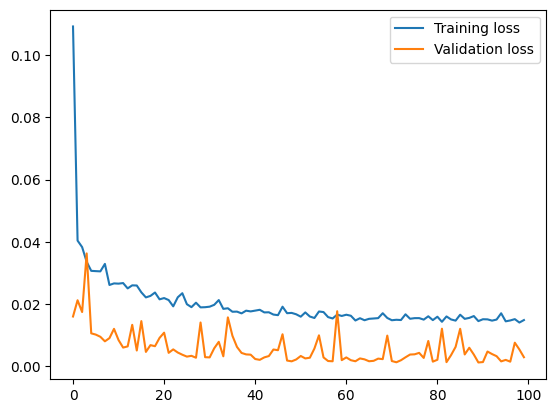

In [111]:
history = model_open.fit(trainX, trainY_open, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For High

In [15]:
model_high = Sequential()
#first layer
model_high.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_high.add(Dropout(0.2))

#second layer
model_high.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_high.add(Dropout(0.3))


#third layer
model_high.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_high.add(Dropout(0.4))



#fourth layer
model_high.add(LSTM(units=100,activation='tanh'))
model_high.add(Dropout(0.5))


#last layer
model_high.add(Dense(units=1))

In [16]:
model_high.compile(optimizer='adam', loss='mse')
model_high.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            17920     
                                                                 
 dropout_4 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30, 60)            30000     
                                                                 
 dropout_5 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 30, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 100)              

Epoch 1/100
90/90 [==============================] - 11s 65ms/step - loss: 0.0890 - val_loss: 0.0191
Epoch 2/100
90/90 [==============================] - 5s 53ms/step - loss: 0.0455 - val_loss: 0.0219
Epoch 3/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0391 - val_loss: 0.0183
Epoch 4/100
90/90 [==============================] - 5s 58ms/step - loss: 0.0355 - val_loss: 0.0138
Epoch 5/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0354 - val_loss: 0.0218
Epoch 6/100
90/90 [==============================] - 5s 60ms/step - loss: 0.0342 - val_loss: 0.0101
Epoch 7/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0328 - val_loss: 0.0112
Epoch 8/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0332 - val_loss: 0.0313
Epoch 9/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0298 - val_loss: 0.0076
Epoch 10/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0274 - val_loss: 0.009

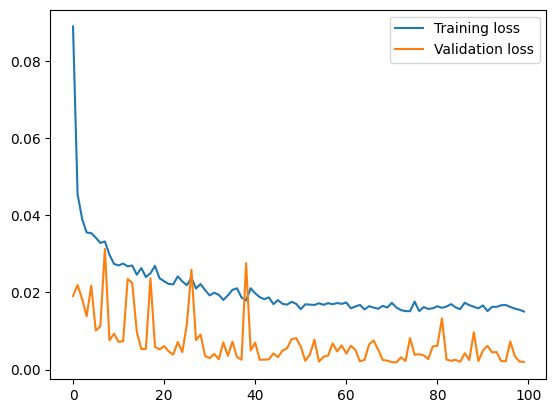

In [17]:
history = model_high.fit(trainX, trainY_high, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For Low

In [18]:
model_low = Sequential()
#first layer
model_low.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_low.add(Dropout(0.2))

#second layer
model_low.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_low.add(Dropout(0.3))


#third layer
model_low.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_low.add(Dropout(0.4))



#fourth layer
model_low.add(LSTM(units=100,activation='tanh'))
model_low.add(Dropout(0.5))


#last layer
model_low.add(Dense(units=1))

In [19]:
model_low.compile(optimizer='adam', loss='mse')
model_low.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30, 64)            17920     
                                                                 
 dropout_8 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 30, 60)            30000     
                                                                 
 dropout_9 (Dropout)         (None, 30, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 100)              

Epoch 1/100
90/90 [==============================] - 12s 70ms/step - loss: 0.0868 - val_loss: 0.0183
Epoch 2/100
90/90 [==============================] - 5s 60ms/step - loss: 0.0439 - val_loss: 0.0183
Epoch 3/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0381 - val_loss: 0.0129
Epoch 4/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0402 - val_loss: 0.0272
Epoch 5/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0344 - val_loss: 0.0108
Epoch 6/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0327 - val_loss: 0.0147
Epoch 7/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0313 - val_loss: 0.0104
Epoch 8/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0296 - val_loss: 0.0085
Epoch 9/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0287 - val_loss: 0.0101
Epoch 10/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0297 - val_loss: 0.009

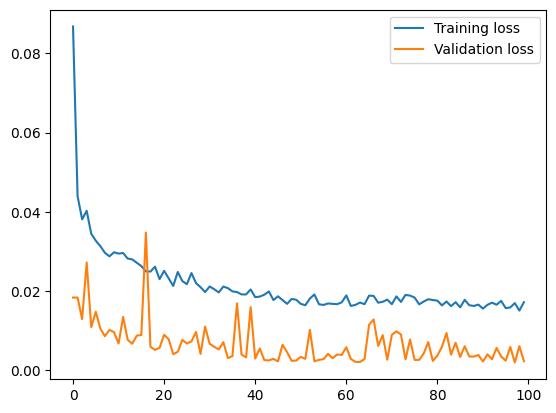

In [20]:
history = model_low.fit(trainX, trainY_low, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For Close

In [21]:
model_close = Sequential()
#first layer
model_close.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_close.add(Dropout(0.2))

#second layer
model_close.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_close.add(Dropout(0.3))


#third layer
model_close.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_close.add(Dropout(0.4))



#fourth layer
model_close.add(LSTM(units=100,activation='tanh'))
model_close.add(Dropout(0.5))


#last layer
model_close.add(Dense(units=1))

In [22]:
model_close.compile(optimizer='adam', loss='mse')
model_close.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            17920     
                                                                 
 dropout_12 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 60)            30000     
                                                                 
 dropout_13 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_14 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_14 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_15 (LSTM)              (None, 100)              

Epoch 1/100
90/90 [==============================] - 14s 94ms/step - loss: 0.0860 - val_loss: 0.0201
Epoch 2/100
90/90 [==============================] - 5s 56ms/step - loss: 0.0471 - val_loss: 0.0178
Epoch 3/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0373 - val_loss: 0.0143
Epoch 4/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0335 - val_loss: 0.0562
Epoch 5/100
90/90 [==============================] - 5s 57ms/step - loss: 0.0375 - val_loss: 0.0113
Epoch 6/100
90/90 [==============================] - 6s 64ms/step - loss: 0.0328 - val_loss: 0.0397
Epoch 7/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0307 - val_loss: 0.0096
Epoch 8/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0289 - val_loss: 0.0103
Epoch 9/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0294 - val_loss: 0.0086
Epoch 10/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0290 - val_loss: 0.007

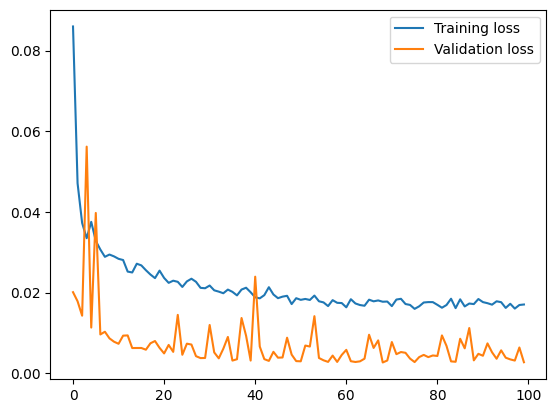

In [23]:
history = model_close.fit(trainX, trainY_close, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

For Adjusted Close

In [24]:
model_adjClose = Sequential()
#first layer
model_adjClose.add(LSTM(units=64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model_adjClose.add(Dropout(0.2))

#second layer
model_adjClose.add(LSTM(units=60,activation='tanh',return_sequences=True))
model_adjClose.add(Dropout(0.3))


#third layer
model_adjClose.add(LSTM(units=80,activation='tanh',return_sequences=True))
model_adjClose.add(Dropout(0.4))



#fourth layer
model_adjClose.add(LSTM(units=100,activation='tanh'))
model_adjClose.add(Dropout(0.5))


#last layer
model_adjClose.add(Dense(units=1))

In [25]:
model_adjClose.compile(optimizer='adam', loss='mse')
model_adjClose.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 64)            17920     
                                                                 
 dropout_16 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 30, 60)            30000     
                                                                 
 dropout_17 (Dropout)        (None, 30, 60)            0         
                                                                 
 lstm_18 (LSTM)              (None, 30, 80)            45120     
                                                                 
 dropout_18 (Dropout)        (None, 30, 80)            0         
                                                                 
 lstm_19 (LSTM)              (None, 100)              

Epoch 1/100
90/90 [==============================] - 14s 99ms/step - loss: 0.0945 - val_loss: 0.0312
Epoch 2/100
90/90 [==============================] - 5s 60ms/step - loss: 0.0464 - val_loss: 0.0224
Epoch 3/100
90/90 [==============================] - 5s 60ms/step - loss: 0.0365 - val_loss: 0.0160
Epoch 4/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0340 - val_loss: 0.0523
Epoch 5/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0317 - val_loss: 0.0116
Epoch 6/100
90/90 [==============================] - 5s 59ms/step - loss: 0.0309 - val_loss: 0.0262
Epoch 7/100
90/90 [==============================] - 6s 61ms/step - loss: 0.0270 - val_loss: 0.0109
Epoch 8/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0284 - val_loss: 0.0085
Epoch 9/100
90/90 [==============================] - 6s 64ms/step - loss: 0.0258 - val_loss: 0.0076
Epoch 10/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0262 - val_loss: 0.007

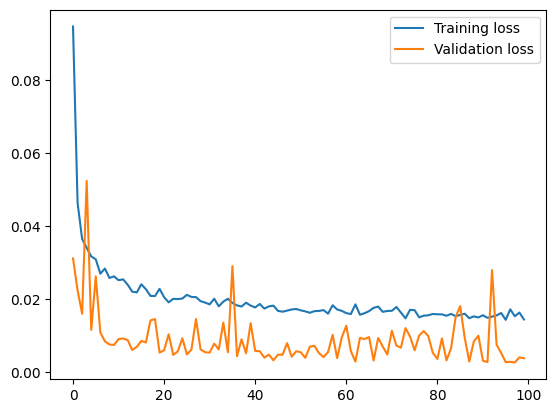

In [26]:
history = model_adjClose.fit(trainX, trainY_adjClose, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Testing

In [27]:
df_for_testing.head()

,Open,High,Low,Close,Adj Close
0,233.625061,240.000061,232.087555,237.412552,232.183533
1,236.887558,243.000061,235.837555,239.025055,233.760529
2,240.300064,240.300064,231.562561,232.462555,227.342545
3,232.575058,234.750061,230.587555,233.737564,228.589493
4,234.750061,235.425064,230.775055,232.162552,227.049149


In [28]:
past_30_days=df_for_training.tail(30)

In [29]:
past_30_days

,Open,High,Low,Close,Adj Close
3184,223.650055,224.137558,220.875061,221.362549,216.487030
3185,221.325058,222.675049,219.300049,220.762558,215.900269
3186,222.862549,223.500061,219.862549,220.500061,215.643555
3187,221.775055,221.775055,219.750061,220.725052,215.863586
3188,221.400055,221.400055,219.825058,220.162552,215.313461
3189,220.800049,220.800049,218.250061,219.525055,214.690033
3190,218.437561,221.512558,218.250061,221.100052,216.230316
3191,221.250061,221.925049,219.975052,221.137558,216.266998
3192,221.250061,224.400055,220.125061,223.987549,219.054199
3193,224.512558,225.337555,217.012558,218.925049,214.103210


In [30]:
final_testing_df=past_30_days.append(df_for_testing,ignore_index=True)

In [31]:
#now scale the testing data

input_data=scaler.fit_transform(final_testing_df)

In [32]:
input_data.shape

(1087, 5)

In [33]:
x_test=[]
y_test_open=[]
y_test_high=[]
y_test_low=[]
y_test_close=[]
y_test_adjClose=[]

for i in range(30,input_data.shape[0]):
    x_test.append(input_data[i-30:i])
    y_test_open.append(input_data[i,0])
    y_test_high.append(input_data[i,1])
    y_test_low.append(input_data[i,2])
    y_test_close.append(input_data[i,3])
    y_test_adjClose.append(input_data[i,4])

In [34]:
x_test,y_test_open,y_test_high,y_test_low,y_test_close,y_test_adjClose=np.array(x_test),np.array(y_test_open),np.array(y_test_high),np.array(y_test_low),np.array(y_test_close),np.array(y_test_adjClose)
print(x_test.shape)
print(y_test_open.shape)

(1057, 30, 5)
(1057,)


For Open

In [35]:
y_pred_open=model_open.predict(x_test)

34/34 [==============================] - 3s 20ms/step


In [36]:
type(y_pred_open)

numpy.ndarray

In [37]:
y_pred_open.shape

(1057, 1)

In [38]:
prediction_copies_open = np.repeat(y_pred_open, df_for_training.shape[1], axis=-1)
y_pred_open = scaler.inverse_transform(prediction_copies_open)[:,0]

In [39]:
y_test_open=y_test_open.reshape(-1,1)
testing_copies_open=np.repeat(y_test_open,df_for_training.shape[1],axis=-1)
y_test_open=scaler.inverse_transform(testing_copies_open)[:,0]

In [40]:
print(y_pred_open)

[234.90344 236.84859 238.8674  ... 588.26294 587.9035  576.34955]


In [41]:
print(y_test_open)

[233.625061 236.887558 240.300064 ... 586.       584.       568.      ]


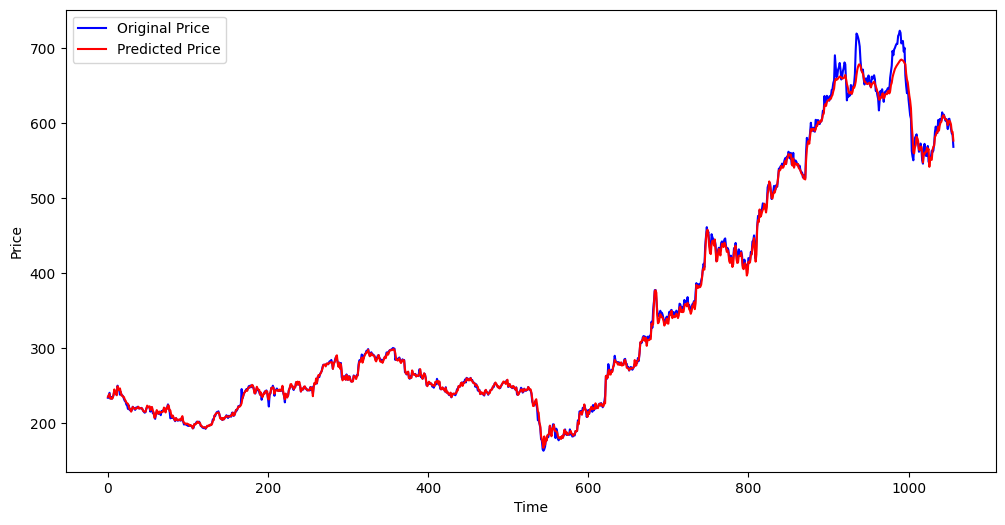

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test_open,'b',label='Original Price')
plt.plot(y_pred_open,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
correct=0
for i in range(1,y_test_open.shape[0]+1):
    if((abs(y_pred_open[i-1]-y_test_open[i-1])/y_test_open[i-1])<=0.1):
        correct+=1

print(correct)

1056


In [44]:
error=0
for i in range(1,1057):
    error+=abs(y_pred_open[i-1]-y_test_open[i-1])

mean=error/1057
mean

3.405192944332242

In [46]:
import math 
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test_open,y_pred_open))
rmse

6.653849162921682

In [47]:
nrmse=rmse/(y_test_high.max()-y_test_high.min())
nrmse

1.8386312178061277

For High

In [48]:
y_pred_high=model_high.predict(x_test)

34/34 [==============================] - 2s 17ms/step


In [49]:
prediction_copies_high = np.repeat(y_pred_high, df_for_training.shape[1], axis=-1)
y_pred_high = scaler.inverse_transform(prediction_copies_high)[:,0]

In [50]:
y_test_high=y_test_high.reshape(-1,1)
testing_copies_high=np.repeat(y_test_high,df_for_training.shape[1],axis=-1)
y_test_high=scaler.inverse_transform(testing_copies_high)[:,0]

In [51]:
print(y_pred_high)

[236.0763  238.09322 240.26251 ... 584.3306  583.9546  573.8325 ]


In [52]:
print(y_test_high)

[236.96813673 239.93813344 237.26513937 ... 580.49769659 577.7751996
 561.68771738]


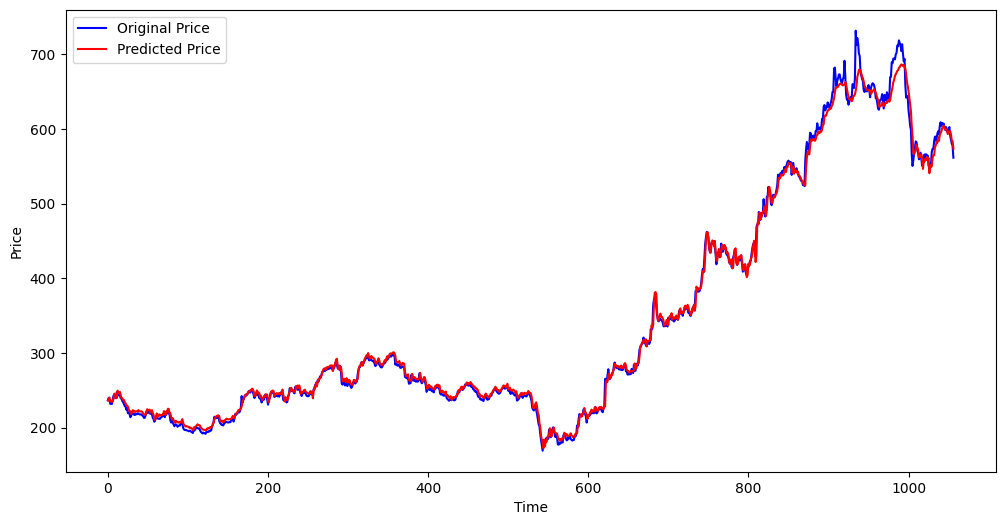

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test_high,'b',label='Original Price')
plt.plot(y_pred_high,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
correct=0
for i in range(1,y_test_high.shape[0]+1):
    if((abs(y_pred_high[i-1]-y_test_high[i-1])/y_test_high[i-1])<=0.1):
        correct+=1

print(correct)

1055


In [55]:
import math 
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test_high,y_pred_high))
rmse

8.506525752362576

For Low

In [56]:
y_pred_low=model_low.predict(x_test)

34/34 [==============================] - 2s 18ms/step


In [57]:
prediction_copies_low = np.repeat(y_pred_low, df_for_training.shape[1], axis=-1)
y_pred_low = scaler.inverse_transform(prediction_copies_low)[:,0]

In [58]:
y_test_low=y_test_low.reshape(-1,1)
testing_copies_low=np.repeat(y_test_low,df_for_training.shape[1],axis=-1)
y_test_low=scaler.inverse_transform(testing_copies_low)[:,0]

In [59]:
print(y_pred_low)

[229.44647 231.97466 234.48962 ... 588.4958  589.9378  576.54297]


In [60]:
print(y_test_low)

[235.1597653  238.95558413 234.62835673 ... 587.8292376  575.27770569
 563.2323437 ]


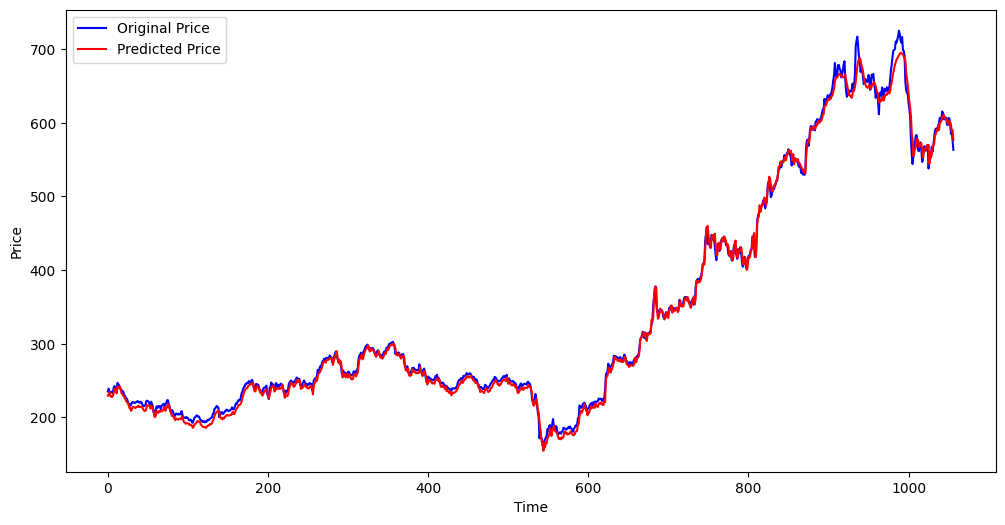

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test_low,'b',label='Original Price')
plt.plot(y_pred_low,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
correct=0
for i in range(1,y_test_low.shape[0]+1):
    if((abs(y_pred_low[i-1]-y_test_low[i-1])/y_test_low[i-1])<=0.10):
        correct+=1

print(correct)

1056


In [63]:
error=0
for i in range(1,1057):
    error+=abs(y_pred_low[i-1]-y_test_low[i-1])

mean=error/1057
mean

5.841103093945809

For Close

In [64]:
y_pred_close=model_close.predict(x_test)

34/34 [==============================] - 2s 17ms/step


In [65]:
prediction_copies_close = np.repeat(y_pred_close, df_for_training.shape[1], axis=-1)
y_pred_close = scaler.inverse_transform(prediction_copies_close)[:,0]

In [66]:
y_test_close=y_test_close.reshape(-1,1)
testing_copies_close=np.repeat(y_test_close,df_for_training.shape[1],axis=-1)
y_test_close=scaler.inverse_transform(testing_copies_close)[:,0]

In [67]:
print(y_pred_close)

[238.61736 240.65515 242.91278 ... 590.91296 590.0178  576.30414]


In [68]:
print(y_test_close)

[237.47546441 239.09127676 232.51530849 ... 584.42352204 571.84771749
 559.42230496]


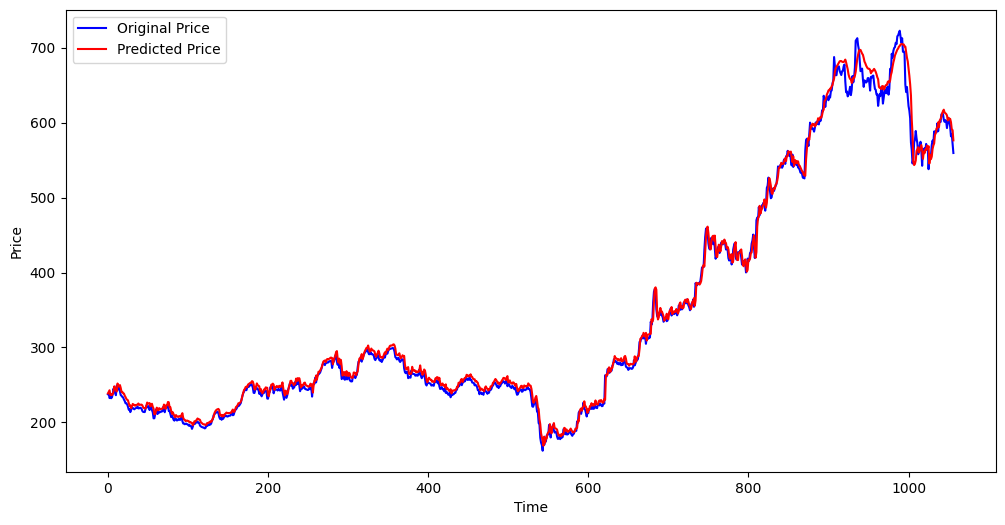

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test_close,'b',label='Original Price')
plt.plot(y_pred_close,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
correct=0
for i in range(1,y_test_close.shape[0]+1):
    if((abs(y_pred_close[i-1]-y_test_close[i-1])/y_test_close[i-1])<=0.1):
        correct+=1

print(correct)

1054


In [71]:
error=0
for i in range(1,1057):
    error+=abs(y_pred_close[i-1]-y_test_close[i-1])

mean=error/1057
mean

6.7654943241887056

For AdjClose

In [72]:
y_pred_adjClose=model_adjClose.predict(x_test)

34/34 [==============================] - 2s 17ms/step


In [73]:
prediction_copies_adjClose = np.repeat(y_pred_adjClose, df_for_training.shape[1], axis=-1)
y_pred_adjClose = scaler.inverse_transform(prediction_copies_adjClose)[:,0]

In [74]:
y_test_adjClose=y_test_adjClose.reshape(-1,1)
testing_copies_adjClose=np.repeat(y_test_adjClose,df_for_training.shape[1],axis=-1)
y_test_adjClose=scaler.inverse_transform(testing_copies_adjClose)[:,0]

In [75]:
print(y_pred_adjClose)

[228.79785 230.78479 232.56697 ... 586.31506 586.2677  577.4094 ]


In [76]:
print(y_test_adjClose)

[236.09805302 237.68614431 231.22300524 ... 590.03735996 577.39901347
 564.91180694]


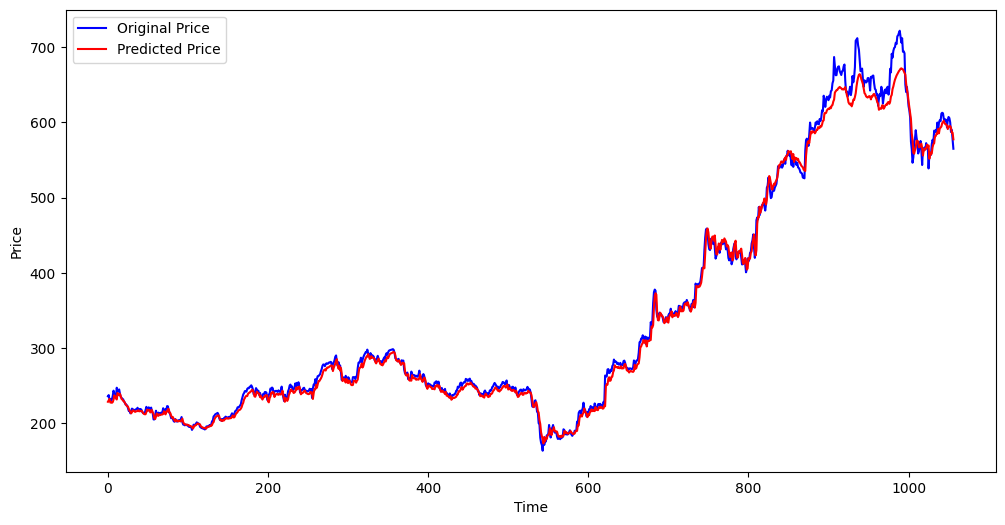

In [77]:
plt.figure(figsize=(12,6))
plt.plot(y_test_adjClose,'b',label='Original Price')
plt.plot(y_pred_adjClose,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [78]:
correct=0
for i in range(1,y_test_adjClose.shape[0]+1):
    if((abs(y_pred_adjClose[i-1]-y_test_adjClose[i-1])/y_test_adjClose[i-1])<=0.1):
        correct+=1

print(correct)

1056


# Forecasting

In [79]:
past_30=df_for_testing.tail(30)

In [80]:
past_30

,Open,High,Low,Close,Adj Close
1027,551.000000,560.099976,544.099976,555.799988,551.211182
1028,555.000000,558.299988,550.400024,555.200012,550.616150
1029,563.000000,575.950012,560.349976,569.549988,564.847656
1030,561.000000,580.000000,554.049988,575.299988,570.550171
1031,563.000000,579.650024,562.250000,571.849976,567.128662
1032,572.000000,590.750000,572.000000,587.450012,582.599854
1033,588.000000,596.400024,582.150024,585.500000,580.665955
1034,595.000000,596.500000,584.599976,588.250000,583.393250
1035,587.000000,590.000000,582.400024,586.200012,581.360168
1036,586.400024,600.799988,586.000000,598.150024,593.211548


In [81]:
input=scaler.fit_transform(past_30)

In [82]:
output=[]
forecast_open=[]
forecast_high=[]
forecast_low=[]
forecast_close=[]
forecast_adjClose=[]
i=0
while(i<10):
    x_input=[]
    x_input.append(input_data[i:i+30]) 
            
    x_input=np.array(x_input)
    forecast_open.append(model_open.predict(x_input)[0][0])
    forecast_high.append(model_high.predict(x_input)[0][0])
    forecast_low.append(model_low.predict(x_input)[0][0])
    forecast_close.append(model_close.predict(x_input)[0][0])
    forecast_adjClose.append(model_adjClose.predict(x_input)[0][0])
    
    temp=[forecast_open[i],forecast_high[i],forecast_low[i],forecast_close[i],forecast_adjClose[i]]
    temp=np.array(temp)
    np.vstack([input,temp])
    i+=1

1/1 [==============================] - 0s 22ms/step


In [83]:
forecast_close=np.array(forecast_close)

In [84]:
forecast_close=forecast_close.reshape((10,1))

In [85]:
forecast_close.shape

(10, 1)

In [86]:
forecast_copies = np.repeat(forecast_close, df_for_training.shape[1], axis=-1)
forecast_close = scaler.inverse_transform(forecast_copies)[:,0]

In [87]:
forecast_close

array([578.6958 , 578.92847, 579.1862 , 578.486  , 578.5849 , 578.446  ,
       578.5962 , 578.99646, 579.7914 , 579.4289 ], dtype=float32)

In [88]:
forecast_open=np.array(forecast_open)

In [89]:
forecast_open=forecast_open.reshape((10,1))

In [90]:
forecast_copies = np.repeat(forecast_open, df_for_training.shape[1], axis=-1)
forecast_open = scaler.inverse_transform(forecast_copies)[:,0]

In [91]:
forecast_open

array([578.2718 , 578.49384, 578.72437, 578.0084 , 578.1246 , 577.9651 ,
       578.1181 , 578.586  , 579.4017 , 578.9523 ], dtype=float32)